In [2]:
import numpy as np
import IPython
import scipy.io.wavfile
import scipy.signal as sig
import matplotlib.pyplot as plt

In [3]:
# define constants here
head = 0.2
d = 2
sound_speed = 340
attenuation = 0.7

# PART 1

In [4]:
def print_filter(l,r):
    plt.figure()
    plt.plot(l)
    plt.plot(r)

def straight(input_sound, fs):
    r = np.sqrt( d**2 + (head/2)**2)
    l = np.sqrt( d**2 + (head/2)**2)
    delay_l = int(l/sound_speed*fs)
    delay_r = int(r/sound_speed*fs)
    lf = np.zeros(delay_l*2)
    rf = np.zeros(delay_l*2)
    lf[delay_l] = 1
    rf[delay_r] = 1
    print_filter(lf,rf)
    l = sig.convolve(lf, input_sound)
    r = sig.convolve(rf, input_sound)
    return np.vstack((l,r))
    
    
def left_45(input_sound, fs):
    rad = np.deg2rad(45)
    h = d * np.sin(rad)
    v = d * np.cos(rad)
    r = np.sqrt( v**2 + (h + head/2)**2)
    l = np.sqrt( v**2 + (h - head/2)**2)
    attenuation = 1 - (1-0.7) * np.sin(rad)
    delay_l = int(l/sound_speed*fs)
    delay_r = int(r/sound_speed*fs)
    lf = np.zeros(delay_l*2)
    rf = np.zeros(delay_l*2)
    lf[delay_l] = 1
    rf[delay_r] = attenuation
    print_filter(lf,rf)
    l = sig.convolve(lf, input_sound)
    r = sig.convolve(rf, input_sound)
    return np.vstack((l,r))

def right_80(input_sound, fs):
    rad = np.deg2rad(80)
    h = d * np.sin(rad)
    v = d * np.cos(rad)
    l = np.sqrt( v**2 + (h + head/2)**2)
    r = np.sqrt( v**2 + (h - head/2)**2)
    attenuation = 1 - (1-0.7) * np.sin(rad)
    delay_l = int(l/sound_speed*fs)
    delay_r = int(r/sound_speed*fs)
    lf = np.zeros(delay_l*2)
    rf = np.zeros(delay_l*2)
    lf[delay_l] = attenuation
    rf[delay_r] = 1
    print_filter(lf,rf)
    l = sig.convolve(lf, input_sound)
    r = sig.convolve(rf, input_sound)
    return np.vstack((l,r))

def left_160(input_sound, fs):
    rad = np.deg2rad(160)
    h = d * np.sin(rad)
    v = d * np.cos(rad)
    r = np.sqrt( v**2 + (h + head/2)**2)
    l = np.sqrt( v**2 + (h - head/2)**2)
    attenuation = 1 - (1-0.7) * np.sin(rad)
    delay_l = int(l/sound_speed*fs)
    delay_r = int(r/sound_speed*fs)
    lf = np.zeros(delay_l*2)
    rf = np.zeros(delay_l*2)
    rf[delay_r] = attenuation
    lf[delay_l] = 1
    print_filter(lf,rf)
    l = sig.convolve(lf, input_sound)
    r = sig.convolve(rf, input_sound)
    return np.vstack((l,r))
    

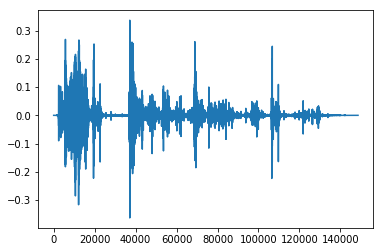

In [17]:
frate1, file1 = scipy.io.wavfile.read("./data/crumble.wav")
IPython.display.display( IPython.display.Audio( file1, rate=frate1))
plt.figure()
plt.plot(file1)

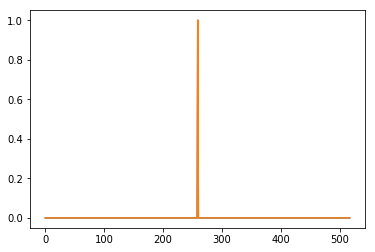

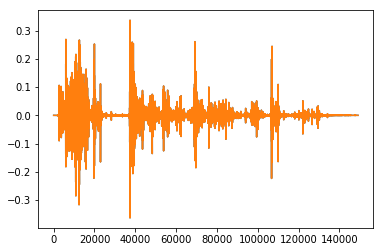

In [18]:
# straight ahead
res0 = straight(file1, frate1)

IPython.display.display( IPython.display.Audio( res0, rate=frate1))
plt.figure()
plt.plot(res0[0])
plt.plot(res0[1])

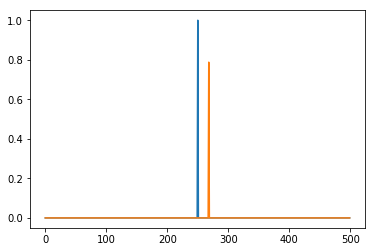

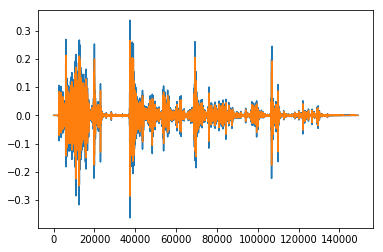

In [19]:
# left 45 degrees
res1 = left_45(file1, frate1)

IPython.display.display( IPython.display.Audio( res1, rate=frate1))
plt.figure()
plt.plot(res1[0])
plt.plot(res1[1])

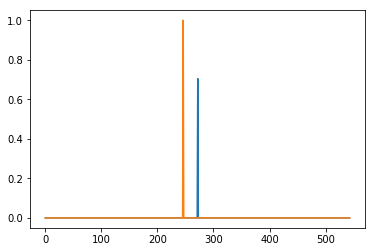

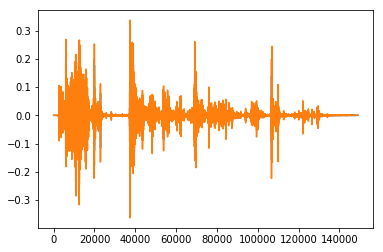

In [20]:
# right 80 degrees
res2 = right_80(file1, frate1)

IPython.display.display( IPython.display.Audio( res2, rate=frate1))
plt.figure()
plt.plot(res2[0])
plt.plot(res2[1])

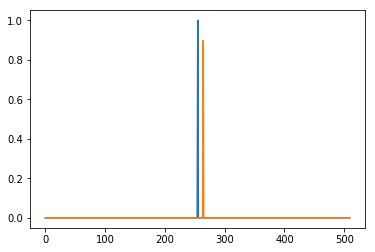

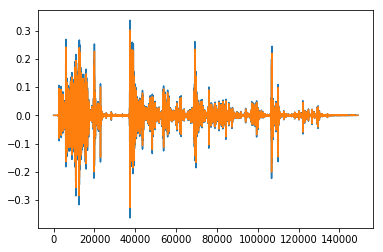

In [21]:
# left 160 degrees
res3 = left_160(file1, frate1)

IPython.display.display( IPython.display.Audio( res3, rate=frate1))
plt.figure()
plt.plot(res3[0])
plt.plot(res3[1])

# PART 2

In [22]:
import sys
sys.path.append("./hrtf")
from load_hrtf import load_hrtf as hrtf

In [23]:
def apply_filter(input_sound, hrtf):
    lf,rf = hrtf
    l = sig.convolve(lf, input_sound)
    r = sig.convolve(rf, input_sound)
    return np.vstack((l,r))

In [24]:
straight_hrtf = apply_filter(file1, hrtf(0,0))
left_45_hrtf = apply_filter(file1, hrtf(-45,0))
right_80_hrtf = apply_filter(file1, hrtf(80,0))
left_160_hrtf = apply_filter(file1, hrtf(-160,0))
IPython.display.display( IPython.display.Audio( straight_hrtf, rate=frate1))
IPython.display.display( IPython.display.Audio( left_45_hrtf, rate=frate1))
IPython.display.display( IPython.display.Audio( right_80_hrtf, rate=frate1))
IPython.display.display( IPython.display.Audio( left_160_hrtf, rate=frate1))

# now we can clearly differentiate where the sound comes from!

# PART 3

In [25]:
# STFT code from lab 1
from numpy.fft import rfft, irfft, fftfreq
def foward_transform(input_sound, dft_size, hop_size, zero_pad, window):
    input_len = len(input_sound)
    idx = 0
    segments = []
    while idx+dft_size < input_len:
        s = input_sound[idx:idx+dft_size]
        segments.append(np.multiply(s, window))
        idx += hop_size
    else:
        s = np.append(input_sound[idx:-1], np.zeros(idx+dft_size-input_len+1))
        segments.append(np.multiply(s, window))
    frames = np.array(segments)
    
    dft_frames = []
    for idx, x in enumerate(frames):
        dft_frames.append(rfft(x, dft_size + zero_pad))
    dft_frames = np.array(dft_frames, dtype=complex)
    return dft_frames 

def inverse_transform(input_sound, dft_size, hop_size, zero_pad, window):
    leng = hop_size*(len(input_sound)-1)+dft_size+zero_pad
    output = np.zeros(leng, dtype=complex)
    for idx, row in enumerate(input_sound):
        frame = np.multiply(irfft(row, dft_size + zero_pad), window)
        output[idx*hop_size:idx*hop_size+dft_size+zero_pad] += frame
    return output

def stft( input_sound, dft_size, hop_size, zero_pad, window):
    if input_sound.ndim == 1 and np.isreal(input_sound).all():
        return foward_transform(input_sound, dft_size, hop_size, zero_pad, window)
    else:
        return inverse_transform(input_sound, dft_size, hop_size, zero_pad, window)

In [26]:
res = stft(file1,256,256,256,1)
l = np.zeros(res.shape, dtype=complex)
r = np.zeros(res.shape, dtype=complex)
for i in range(0,res.shape[0]):
    lf, rf = hrtf((i/res.shape[0])*360, 0)
    l[i] = res[i]*rfft(lf,512)
    r[i] = res[i]*rfft(rf,512)
    
l_out = stft(l,256,256,256,1)
r_out = stft(r,256,256,256,1)
res_sound = np.vstack((l_out,r_out))
print("Now you should hear the sound moving around you!")
IPython.display.display(IPython.display.Audio(res_sound, rate=frate1))

Now you should hear the sound moving around you!


C:\Users\Finale\Anaconda3\lib\site-packages\IPython\lib\display.py:124: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
